# Promedio del precio del combustible Colombia 2019 por departamento y municipio

Prueba de herramientas gráficas de librería PlotLy realizada por Juan David Ortiz Trujillo.El conjunto de datos se extrae del informe de el departamento de minas y energía, actualizado hasta el año 2019: https://www.datos.gov.co/Econom-a-y-Finanzas/Precios-de-Combustibles-MinEnerg-a/7pcy-5vx9 contando con 418853 entradas.

- Se comienza por importar las librerías necesarias, cargar a un nuevo DataFrame el conjunto de datos y observar las columnas disponibles.

In [276]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [277]:
df = pd.read_csv('Precios_de_Combustibles_-_MinEnerg_a.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418853 entries, 0 to 418852
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   periodo             418853 non-null  int64  
 1   mes                 418853 non-null  object 
 2   CodigoDepartamento  418853 non-null  float64
 3   NombreDepartamento  418853 non-null  object 
 4   CodigoMunicipio     418853 non-null  float64
 5   municipio           418853 non-null  object 
 6   nombrecomercial     418850 non-null  object 
 7   bandera             418853 non-null  object 
 8   direccion           418853 non-null  object 
 9   producto            418853 non-null  object 
 10  precio              418853 non-null  int64  
 11  estado              418853 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 38.3+ MB


 ---
 
 ## 1. Limpieza y preparación de datos
 
 - Se eliminan filas que cuenten con todas sus columnas nulas, luego se remplazan los valores nulos de la columna "nombrecomercial" a cadenas de texto con las que se pueda trabajar, finalmente se verifica si todavía existen valores NaN.

In [278]:
df.dropna(how='all',inplace=True)
df['nombrecomercial'] = df['nombrecomercial'].fillna('No registra')
if df[df.isnull().any(axis=1)]:
    print("Todavía existen valoes NaN")
df.head(2)

,periodo,mes,CodigoDepartamento,NombreDepartamento,CodigoMunicipio,municipio,nombrecomercial,bandera,direccion,producto,precio,estado
0,2017,Enero,13.0,HUILA,645.0,GARZON,ESTACION DE SERVICIO ZULUAGA,BIOMAX,CALLE 4 No. 2-15,BIODIESEL EXTRA,8055,A
1,2017,Enero,9.0,CESAR,439.0,BECERRIL,ESTACION DE SERVICIO AUTOMOTRIZ LA PALETILLA,SAVE,Cra 5 No. 6-36,BIODIESEL EXTRA,6500,A


- Procedemos con la preparación de datos, para ello cambiamos el tipo de aquellos con los que no podamos trabajar o que no se vean coherentes con el contexto. En este caso cambiamos columnas float a tipo int y object.

- Los datos object que sean muy extensos para dar inconvenientes en el graficado, se les reemplaza por el mismo valor acortado.

In [279]:
df['CodigoDepartamento'] = df['CodigoDepartamento'].astype('object')
df['CodigoMunicipio'] = df['CodigoMunicipio'].astype('object')
df['precio'] = df['precio'].astype('float64')

In [280]:
df = df.replace('ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y PROVIDENCIA','SAN ANDRES Y PR...')

---

## 2. Programación de funciones de graficado.

- Utilizando la librería de graficado PlotLy se crea una función la cual reciba una columna en la cual se van a graficar los datos en el eje x, el periodo, el cual en este caso será el año y una cadena de texto la cual se va a concatenar en el título del resultado.

- La función crea 2 subplots que comparten su eje y, en el primero se ubicara la gráfica con los valores x con valores y más altos, y el la segunda los valores x con los valores y mas bajos.

- Los valores en y serán los promedios en todo el periodo del paŕametro.

In [316]:
def graficar_mayores_menores(columna,periodo,nombre_columna):
    """crea 2 subplots con los 10 indices con promedios mas
    bajos y altos"""
    df_plot = df.loc[df['periodo'] == periodo]
    df_plot = df_plot.groupby(f'{columna}').mean()
    df_plot.sort_values(by=['precio'],ascending=False,inplace=True) 
    df_plot['precio'] = df_plot['precio'].astype(float).apply('{:,.2f}'.format)
    
    mayores = df_plot.head(10)
    menores = df_plot.tail(10)
    
    title = f'{nombre_columna} con mayor y menor promedio de precio de combustible en {periodo}'
    fig = make_subplots(rows=1, cols=2,shared_yaxes=True)
    fig.add_trace(go.Bar(x=mayores.index,y=mayores['precio'],name="Mayor promedio"),1,1,)
    fig.add_trace(go.Bar(x=menores.index,y=menores['precio'],name="Menor promedio"),1,2)
    fig.update_xaxes(tickangle=45, tickfont=dict( size=9))
    fig.update_layout(yaxis_tickformat = '$',title =title)
    fig.show()
    print('')


def graficar_datos_ordenados(columna, periodo, nombre_columna):
    df_plot = df.loc[df['periodo'] == periodo]
    df_plot = df_plot.groupby(f'{columna}').mean()
    df_plot.sort_values(by=['precio'], ascending=False, inplace=True) 
    df_plot['precio'] = df_plot['precio'].astype(float).apply('{:,.2f}'.format)
    title = f'promedio de precio de {nombre_columna} en {periodo}'
    fig = px.bar(x=df_plot.index, y=df_plot['precio'],template="seaborn")
    fig.update_yaxes(title='valor en pesos')
    fig.update_xaxes(tickangle=45, tickfont=dict( size=9),title='Tipo de producto')
    fig.update_layout(yaxis_tickformat = '$',title =title)
    fig.show()
    print('')


---

## 3. Representación de los datos:

- se llama a la función anterior con los argumentos mencionados. Por lo que podemos observar y sacar conclusiónes en cuanto al promedio del precio del combustible en 2019 en los departamentos y municipios del país.

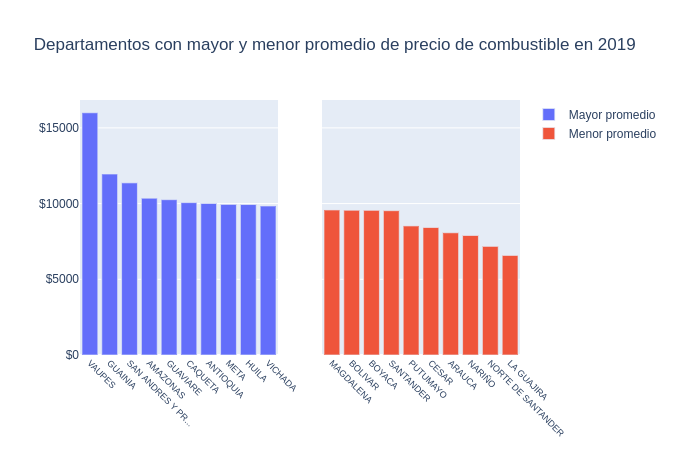

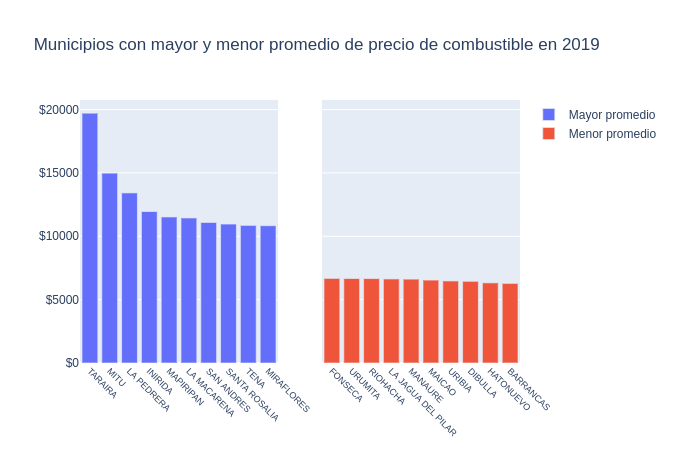

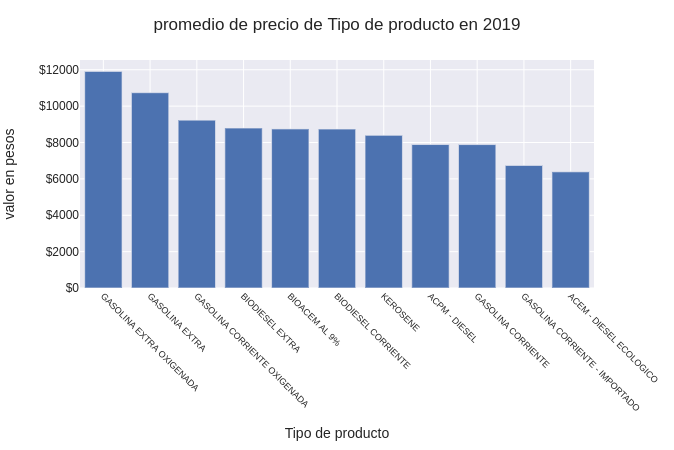

In [317]:
graficar_mayores_menores('NombreDepartamento',2019,'Departamentos')
graficar_mayores_menores('municipio',2019,'Municipios')
graficar_datos_ordenados('producto',2019,'Tipo de producto')

---

## 4. Conclusiones.

- El costo del combustible en el municipio de Taraira al ser tan alto afectó los valores del departamento de Vaupez, quedando como el que tuvo el promedio mas alto en el precio en 2019 con $15998 por galón.

- La Guajira fué el departamento con el combustible más barato, con un promedio de $6,576 por galón.

- El combustible más económico en el 2019 fué el ACEM o Diesel económico, con un valor por galón promedio de $6388.